In [12]:
# Datensatzverarbeitung (engl. dataset pipeline)
%pip install pandas
%pip install ipython
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Aufgabe 1: NLP-Techniken anwenden, um eine Textsammlung zu analysieren

## Datensatzverarbeitung (engl. dataset pipeline)

### Datensatzsichtung (engl. dataset inspection)
Die Datensatzsichtung untergliedert sich in Datenstrukturanalyse, Explorative Datenanalyse und die Datensatzaufbereitung.

#### Datenstrukturanalyse (engl. data structure analysis)
Die Stukturiertung des Datensatzes wird durch die Datenstrukturanalyse erkundet. Der Datensatz `complaints_data.csv` wird eingelesen und die Struktur der Daten untersucht. Es werden die ersten 10 Zeilen sowie die wichtigsten Metadaten (Spalten, Datentypen, Anzahl der Werte) angezeigt, um einen ersten Überblick über den Aufbau des Datensatzes zu erhalten.

In [13]:
# Datenstrukturanalyse (engl. data structure analysis)
print("=== Datenstrukturanalyse (engl. data structure analysis) ===")


import pandas as pd
from IPython.display import display

df1 = pd.read_csv('../datasets/complaints_data.csv')

print("--- Vorschau der ersten 10 Zeilen ---")
display(df1.head(10))

print("\n--- Übersicht der Datenstruktur ---")
df1.info()

=== Datenstrukturanalyse (engl. data structure analysis) ===
--- Vorschau der ersten 10 Zeilen ---


,author,posted_on,rating,text
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...
5,"Terri of Mobile, AL","Nov. 9, 2016",1,Thank God. I am changing to Dish. They gave me...
6,"Kellie of Salt Lake City, UT","Nov. 9, 2016",1,I Have been a long time customer and only have...
7,"Kathleen of New Haven, CT","Nov. 6, 2016",2,There is a malfunction on the DVR manager whic...
8,"Shira of Bloomfield, NJ","Nov. 5, 2016",1,Charges overwhelming. Comcast service rep was ...
9,"Kristy of Alpharetta, GA","Nov. 2, 2016",1,"I have had cable, DISH, and U-verse, etc. in t..."



--- Übersicht der Datenstruktur ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     5659 non-null   object
 1   posted_on  5659 non-null   object
 2   rating     5659 non-null   int64 
 3   text       5629 non-null   object
dtypes: int64(1), object(3)
memory usage: 177.0+ KB


#### Explorative Datenanalyse (EDA)
Im Rahmen der EDA wird der Datensatz untersucht. Es werden stukturiert und unstrukturiert vorliegende Informationen für die weitere Verarbeitung identifiziert.

##### Analyse der strukturierten Daten (engl. analysis of structured data)
Analyse der strukturiert vorliegenden Daten aus den Spalten "author" "posted_on" und "rating".

###### Ortsdaten (engl. location data)

In [14]:
### Ortsdatenanalyse
import pandas as pd
df = pd.read_csv('../datasets/complaints_data.csv')

#### Extrahieren der Bundesstaaten aus der "author"-Spalte
df["state"] = df["author"].str.extract(r",\s*([A-Z]{2})\s*$", expand=False)                 # Spalte "state" für Visualisierung in Datennachverarbeitung

##### State-Codes: alle extrahierten (2 Großbuchstaben am Ende)
all_extracted = df["state"].dropna().unique()

##### gültige State-Codes: US-Bundesstaaten (50 Staaten + DC / 51 Referenz)
all_states_set = {
    "AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA",
    "KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ",
    "NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT",
    "VA","WA","WV","WI","WY","DC"
}
##### ungültige State-Codes
invalid_states = [s for s in all_extracted if s not in all_states_set]
print(f"Bundesstaaten ungültig: {len(invalid_states)} \n{sorted(invalid_states)}\n")

all_states = pd.Series(list(all_states_set))

valid_states_only = df["state"].dropna()
valid_states_only = valid_states_only[valid_states_only.isin(all_states_set)]

#### Verteilung der Beschwerden nach den Bundesstaaten
##### Bundesstaaten MIT Beschwerden
print(f"Bundesstaaten mit Beschwerden: {len(valid_states_only.value_counts())}")
for state, count in valid_states_only.value_counts().items():
    print(f"{state}: {count}")

##### Bundesstaaten OHNE Beschwerden
missing_states = all_states_set - set(valid_states_only.unique())
print(f"\nBundesstaaten ohne Beschwerden: {len(missing_states)}\n",
    sorted(missing_states), sep='')

### Kontrollrechnung (51 Bundesstaaten insgesamt)
print(f"\nKONTROLLE: {len(valid_states_only.value_counts())} + {len(missing_states)} = {len(valid_states_only.value_counts()) + len(missing_states)}")

Bundesstaaten ungültig: 3 
['BC', 'ON', 'PE']

Bundesstaaten mit Beschwerden: 46
FL: 778
CA: 554
GA: 414
IL: 378
PA: 326
NJ: 278
TX: 274
MI: 266
TN: 244
MD: 238
WA: 215
VA: 215
MA: 184
CO: 182
IN: 144
MN: 108
OR: 100
CT: 75
UT: 62
AL: 55
NH: 45
DC: 41
SC: 41
DE: 40
NM: 38
MS: 35
NY: 32
LA: 28
AZ: 22
WV: 21
KY: 21
AR: 19
VT: 12
OH: 12
MO: 12
WI: 9
ME: 7
NC: 7
NV: 5
KS: 4
ID: 2
ND: 2
HI: 2
AK: 1
WY: 1
NE: 1

Bundesstaaten ohne Beschwerden: 5
['IA', 'MT', 'OK', 'RI', 'SD']

KONTROLLE: 46 + 5 = 51


###### Zeitdaten (engl. time data)

In [15]:
# Zeitdatenanalyse
print("=== Zeitdatenanalyse ===\n")
import pandas as pd
df = pd.read_csv('../datasets/complaints_data.csv')
# 1. Datum konvertieren (Format: "Nov. 22, 2016")
df['date'] = pd.to_datetime(df['posted_on'], format='mixed')

## Zeitraum
print("*** Zeitraum ***")
print(f"Erstes Datum:   {df['date'].min().strftime('%Y-%m-%d')}")
print(f"Letztes Datum:  {df['date'].max().strftime('%Y-%m-%d')}")
total_days = (df['date'].max() - df['date'].min()).days
years = total_days // 365
remaining_days = total_days % 365
print(f"Zeitraum:       {years} Jahre, {remaining_days} Tage ({total_days} Tage)")

## Datum extrahieren
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()
df['year_month'] = df['date'].dt.to_period('M')

# Monatskategorie für korrekte Sortierung
months_order = pd.date_range(start='2026-01-01', end='2026-12-01', freq='MS').strftime('%B').tolist()
df['month_name'] = pd.Categorical(df['month_name'], categories=months_order, ordered=True)

# DataFrame chronologisch sortieren
df = df.sort_values(['year', 'month']).reset_index(drop=True)

# Verteilung der Beschwerden
print("\n*** Verteilumng der Beschwerden ***")

## Verteilung pro Jahr
print("\nVerteilung pro Jahr:")
print(df['year'].value_counts().sort_index())

## Verteilung pro Monat
print("\nVerteilung pro Monat:")
print(df['month_name'].value_counts().sort_index())

## Verteilung pro Wochentag
print("\nVerteilung pro Wochentag:")
print(df['weekday'].value_counts())

=== Zeitdatenanalyse ===

*** Zeitraum ***
Erstes Datum:   2000-07-31
Letztes Datum:  2016-11-22
Zeitraum:       16 Jahre, 118 Tage (5958 Tage)

*** Verteilumng der Beschwerden ***

Verteilung pro Jahr:
year
2000       1
2001       2
2002       1
2003       6
2004      10
2006      34
2007     106
2008     441
2009     462
2010     415
2011     357
2012     418
2013     313
2014     770
2015    1477
2016     846
Name: count, dtype: int64

Verteilung pro Monat:
month_name
January      485
February     476
March        441
April        369
May          394
June         461
July         529
August       540
September    507
October      526
November     505
December     426
Name: count, dtype: int64

Verteilung pro Wochentag:
weekday
Wednesday    993
Tuesday      960
Thursday     861
Monday       820
Friday       802
Saturday     659
Sunday       564
Name: count, dtype: int64


###### Bewertungen (engl. rating data)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../datasets/complaints_data.csv')
print("=== Bewertungsanalyse ===\n")

# Absolute Verteilung
print("*** Absolute Verteilung der Bewertungen ***\n")
verteilung = df['rating'].value_counts()
print(verteilung)

# Balkendiagramm der Verteilung
df['rating'].value_counts().plot(kind='bar')
plt.title('Verteilung der Ratings')
plt.xlabel('Rating')
plt.ylabel('Häufigkeit')
plt.show()

# Prozentuale Verteilung
print("*** Relative Verteilung der Bewertungen ***\n")
prozente = (df['rating'].value_counts(normalize=True) * 100).round(2).astype(str) + '%'
print(prozente)

ImportError: cannot import name 'Image' from 'PIL' (unknown location)

##### Fehlwertanalyse (engl. missing value analysis)
Bei der Fehlwertanalyse werden leere Zellen (NaNs/NaTs) im Datensatz und fehlerhaft erhobene Daten identifiziert. ////// VORSICHT TEIL DER DATENSATZVALIDIERUNG

In [ ]:
# Fehlwertanalyse (engl. missing value analysis)
print("=== Fehlwertanalyse (engl. missing value analysis) ===\n")
import pandas as pd
df = pd.read_csv('../datasets/complaints_data.csv')

# Fehlwerterfassung
## Fehlwerte in den strukturierte Daten
fehlende_author = df[df['author'].isna()]
fehlende_posted_on = df[df['posted_on'].isna()]
fehlende_rating = df[df['posted_on'].isna()]

## ungültige US-Bundesstaaten ['BC', 'ON', 'PE']
df["state"] = df["author"].str.extract(r",\s*([A-Z]{2})\s*$", expand=False)
all_states_set = {
    "AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA",
    "KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ",
    "NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT",
    "VA","WA","WV","WI","WY","DC"
}
invalid_states = df[~df["state"].isin(all_states_set) & df["state"].notna()]
## Fehlwerte ungültige Bundesstaaten
print("*** Fehlwerterfassung ungültige Bundesstaaten ***\n")
print(invalid_states[['author', 'text']].to_string(index=True, max_colwidth=100))

print(f"\n    Zeilen mit ungültigen US-Bundesstaaten: {len(invalid_states)}")

## Fehlwerte in den unstrukturierte Daten
fehlende_text = df[df['text'].isna()]

# Fehlwertausgabe
## Fehlwertausgabe stukturierte Daten
print("\n*** Fehlwerterfassung strukturierte Daten ***")
print(f"    Fehlwerte in 'author': {len(fehlende_author)}")
print(f"    Fehlwerte in 'posted_on': {len(fehlende_posted_on)}")
print(f"    Fehlwerte in 'rating': {len(fehlende_rating)}")
## Fehlwertausgabe unstukturierte Daten
print("\n*** Fehlwerterfassung unstrukturierte Daten ***")
print(f"    Fehlwerte in 'text': {len(fehlende_text)}")

=== Fehlwertanalyse (engl. missing value analysis) ===

*** Fehlwerterfassung ungültige Bundesstaaten ***

                            author                                                                                                 text
1586  Sylvain of San Francisco, BC  If you sign with Comcast, it is very likely you'll have to deal with their customer service - an...
2015        Joshua of Portland, ON  Most recently, Zach, Technician #** came out at my request and gave me a new X1 set top box and ...
3195         Susan of Broomall, PE  I tried calling Comcast to resolve an issue with my ON Demand, I waited almost an hour, was disc...

    Zeilen mit ungültigen US-Bundesstaaten: 3

*** Fehlwerterfassung strukturierte Daten ***
    Fehlwerte in 'author': 0
    Fehlwerte in 'posted_on': 0
    Fehlwerte in 'rating': 0

*** Fehlwerterfassung unstrukturierte Daten ***
    Fehlwerte in 'text': 30


##### Analyse der unstrukturierten Daten (engl. analysis of unstructured data)
Analyse der unstrukturiert vorliegenden Daten aus den Spalten "text".

###### Duplikaterkennung (engl. duplicate detection)

In [ ]:
### Duplikaterkennung (engl. duplicate detection)
print("=== Duplikaterkennung (engl. duplicate detection) ===\n")

import pandas as pd

# Datensatz laden
df = pd.read_csv('../datasets/complaints_data.csv')

duplikate = df[df.duplicated(keep=False)]

### Duplikate nach Zeilen
print("*** Duplikate pro Zeile ***")
print(f"Gesamtzeilen:                    {len(df):,}")
print(f"Doppelte Gesamtzeilen:           {df.duplicated().sum():,}")
print(f"Duplikat-Anteil:                 {(df.duplicated().sum() / len(df) * 100):.2} %")
print()

### Duplikate darstellen
print("*** Darstellung: Duplikate pro Zeile ***\n")
pd.set_option('display.max_colwidth', None)  # Unbegrenzte Breite
pd.set_option('display.width', 500)          # Gesamtbreite erhöhen
print(df[df.duplicated(keep=False)])

print(f"\nAnzahl doppelter Zeilen: {len(duplikate)}")

### Duplikate nach Spalten
print("\n*** Duplikate pro Spalte ***")
print(f"Doppelte author-Spalten:         {df.duplicated(subset=['author']).sum():,}")
print(f"Doppelte text-Spalten:           {df.duplicated(subset=['text']).sum():,}")
print()

### Duplikate nach Spalte "text
print("*** Duplikate nach Spalte 'text' ***\n")
duplikate_text = df[df.duplicated(subset=['text'], keep=False)]
print(duplikate_text)
print(f"\nAnzahl doppelter text-Zeilen: {len(duplikate_text)}")

=== Duplikaterkennung (engl. duplicate detection) ===

*** Duplikate pro Zeile ***
Gesamtzeilen:                    5,659
Doppelte Gesamtzeilen:           1
Duplikat-Anteil:                 0.018 %

*** Darstellung: Duplikate pro Zeile ***

                          author     posted_on  rating                                                                                                                                                                                                                                                                                                                                                                                                                                          text
1397  Jennifer of Wheatridge, CO  Nov. 2, 2016       1  The services provided by Comcast are ridiculous. You pay lots of money for no adequate service. Everything keeps dropping from the cable to the internet to the phone on important calls. It takes hours to get the custom

###### Textlängenanalyse (engl. text length analysis)
Bei der Textlängenanalyse werden die Längen der Bewertungen und ihrer Sätze anhand der Zeichenanzahl durchgeführt.

####### Beschwerdelängenanalyse (engl. complaint length analysis)

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Datensatz laden
df3 = pd.read_csv('../datasets/complaints_data.csv')

print("=== Textlängenanalyse (engl. text length analysis) ===\n")


=== Textlängenanalyse (engl. text length analysis) ===



####### Satzlängenanalyse (engl. sentence length analysis)

=== Textlängenanalyse (engl. text length analysis) ===

*** Satzlängenanalyse (engl. sentence length analysis) ***

Sätze in 'text': 86308 (über 5659 Zeilen)

*** Satz-Statistiken ***
count    5659.00
mean       15.25
std        26.89
min         0.00
25%         7.00
50%        11.00
75%        18.00
max      1706.00
Name: saetze, dtype: float64
*** Satzzahlen in Prozent im Datensatz ***

  Bin  Anzahl Prozent
    0      30   0.53%
  1-2     131   2.31%
  3-4     441   7.79%
  5-9    1698  30.01%
10-19    2111   37.3%
20-29     713   12.6%
30-49     398   7.03%
50-99     116   2.05%
 100+      20   0.35%



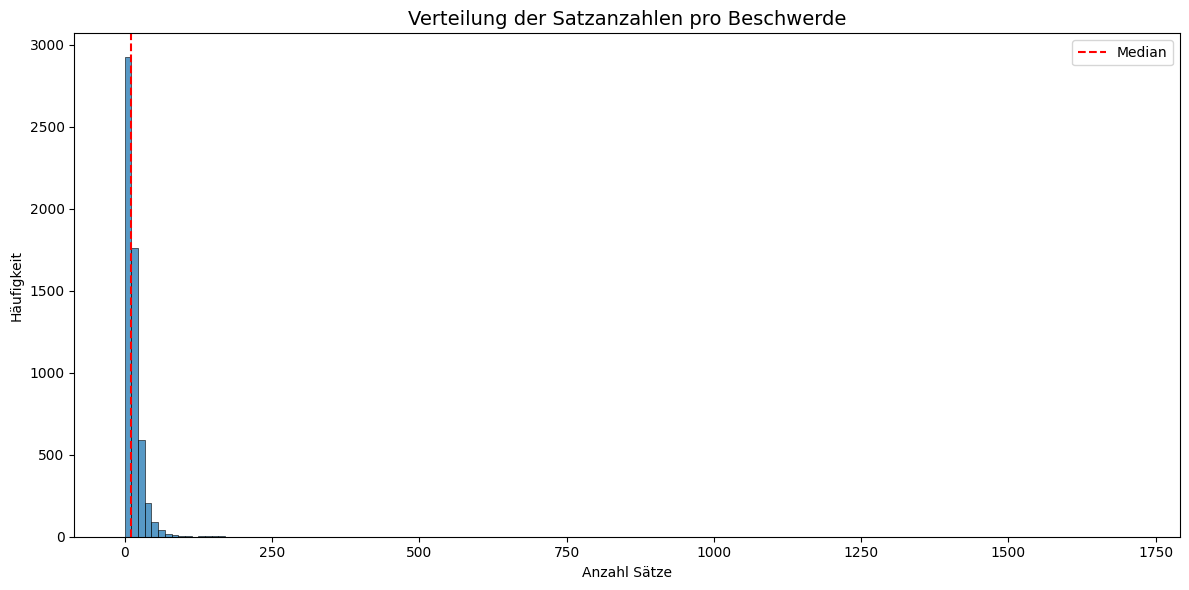

=== Längste 5 Bewertungen ===

Indizes: [5237, 5386, 5362, 5465, 5358]
      text_length  saetze                                                                                                                                                                                                                                                               text
5237      93136.0    1706  Channel 65 did not work since about August 1, 2008 on all non-cable box TVs\nLow or no signals since September 15, 2008.\nTechnicians at house about once a week since October 1, 2008.\nSpecific Dates\nIn October, a technician came to the house and put am...
5386      26593.0     357      As a Taxpaying, American Combat Veteran, I will swear under oath this is a true story & the story before you has been condensed believe it or not.  Today is 07/30/08 and I have been a Comcast customer for 10 years plus.   A couple of weeks before our...
5362      24039.0     289            I originally signed up with Adelphia 

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Datensatz laden
df3 = pd.read_csv('../datasets/complaints_data.csv')

print("=== Textlängenanalyse (engl. text length analysis) ===\n")

print("*** Satzlängenanalyse (engl. sentence length analysis) ***\n")
def saetze_pandas(df, spalten_name):  # <- df als Parameter!
    """Zählt Sätze in angegebener Spalte mit Pandas."""
    # Explizite Konvertierung zu String und Behandlung von NaNs
    df[spalten_name] = df[spalten_name].astype(str).replace('nan', '')
    
    # Sätze zählen pro Zelle
    df['saetze'] = df[spalten_name].apply(
        lambda x: len([s for s in re.split(r'[.!?]+', str(x)) if s.strip()])
    )
    
    gesamt = df['saetze'].sum()
    print(f"Sätze in '{spalten_name}': {gesamt} (über {len(df)} Zeilen)")
    return gesamt

# Verwendung mit df3
saetze_pandas(df3, 'text')

# Satz-Statistik
# Sicherstellen, dass NaNs behandelt werden, bevor astype(str) angewendet wird
# Wenn astype(str) auf NaN angewendet wird, entsteht "nan", was okay ist, aber
# falls re.split probleme mit float Inputs hat (was hier der Fall scheint für bestimmte Pandas Versionen)
# sicherstellen, dass Apply wirklich Strings bekommt.

df3['saetze'] = df3['text'].fillna('').astype(str).apply(
    lambda x: len([s for s in re.split(r'[.!?]+', x) if s.strip()])
)

print("\n*** Satz-Statistiken ***")
print(df3['saetze'].describe().round(2))

# Satzlängen-Berechnung
total_valid = df3['saetze'].count()  # Anzahl gültiger Satz-Zählungen

## Definieren der Bins und Labels für Satzzahlen
bins = [0, 1, 3, 5, 10, 20, 30, 50, 100, 1000]  # Angepasst an typische Satzzahlen
labels = ['0', '1-2', '3-4', '5-9', '10-19', 
          '20-29', '30-49', '50-99', '100+']

df3['saetze_bin'] = pd.cut(df3['saetze'], bins=bins, labels=labels, right=False)

## Tabelle mit Häufigkeiten und Prozenten
print("*** Satzzahlen in Prozent im Datensatz ***\n")

result = df3['saetze_bin'].value_counts().sort_index().reset_index()
result.columns = ['Bin', 'Anzahl']
result['Prozent'] = (result['Anzahl'] / total_valid * 100).round(2)
result['Prozent'] = result['Prozent'].astype(str) + '%'
print(result.to_string(index=False))
print()

# Histogramm für Sätze
plt.figure(figsize=(12, 6))
sns.histplot(data=df3, x='saetze', bins=150)
plt.axvline(df3['saetze'].median(), color='red', linestyle='--', label='Median')
plt.title('Verteilung der Satzanzahlen pro Beschwerde', fontsize=14)
plt.xlabel('Anzahl Sätze')
plt.ylabel('Häufigkeit')
plt.legend()
plt.tight_layout()
plt.show()

# Textlänge berechnen
df3['text_length'] = df3['text'].astype(str).str.len()

# Die längsten 5 Bewertungen nach text_length finden
laengste_indices = df3.nlargest(5, 'text_length').index.tolist()

print("=== Längste 5 Bewertungen ===\n")
print(f"Indizes: {laengste_indices}")

# Ausgabe der längsten 5 Bewertungen
top_5 = df3.loc[laengste_indices][['text_length', 'saetze', 'text']].copy()
top_5['text'] = top_5['text'].str[:250] + "..."
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 500)
print(top_5.round(0))

print("\n=== Längste Bewertung ===\n")
# Längste Bewertung mit Zeilenumbrüchen ausgeben
def text_mit_umbruechen(text, max_zeichen=300):
    """Text in Zeilen mit max_zeichen aufteilen"""
    words = str(text).split()
    lines = []
    current_line = ""
    
    for word in words:
        if len(current_line) + len(word) + 1 <= max_zeichen:
            current_line += word + " "
        else:
            lines.append(current_line.strip())
            current_line = word + " "
    if current_line:
        lines.append(current_line.strip())
    return '\n'.join(lines)

# Anwenden auf Zeile 5237
text_5237 = text_mit_umbruechen(df3.loc[5237, 'text'])
print(text_5237)

### Datensatzaufbereitung (engl. dataset preparation)
In der Datensatzaufbereitung erfolgen Datensatzbereinigung und Datensatzvalidierung welche den Datensatz für die den Anwendungsfall, sprich die Modellbildung vorbereiten. Hierbei werden die in der EDA gewonnenen Erkenntnisse genutzt, um diejenigen Datenzu bestimmen, die weiter verarbeitet werden.
### Datensatzbereinigung (engl. dataset cleaning)

In [ ]:
# Datensatzbereinigung (engl. dataset cleaning)
import pandas as pd

df1 = pd.read_csv('../datasets/complaints_data.csv') # Referenzdatensatz
df2 = pd.read_csv('../datasets/complaints_data.csv') # zu bereinigender Datensatz

#### Fehlwertbehandlung (engl. missing value handling)
Die Behandlung von Fehlwerten wie NaNs (Not a Number) oder NaTs (Not a Text) kann durch listenweisen Fallausschluss, durch welchen Zeilen ohne Text oder Text unter einer Mindestlänge entfernt wird oder Imputation, das Auffüllen oder Ersetzen fehlender oder unvollständiger Textelemente durch geschätzte Werte, damit der Datensatz für Modelltraining oder Analyse vollständig nutzbar bleibt.

In [ ]:
df2 = pd.read_csv('../datasets/complaints_data.csv') # zu bereinigender Datensatz
print("Fehlwertbehandlung (engl. missing value handling)\n")
### NaT-handling
nat_texts = df2['text'].isna().sum()
print(f"NaTs entfernt:                {nat_texts}\n")
fehlende_texte = df2[df2['text'].isna()]
print(f"Zeilenindizes:                {fehlende_texte.index.tolist()}")

Fehlwertbehandlung (engl. missing value handling)

NaTs entfernt:                30

Zeilenindizes:                [1321, 1322, 1323, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 5613, 5614, 5615, 5617, 5618, 5619, 5620, 5621, 5623, 5624, 5625, 5626, 5630, 5634, 5636, 5637, 5638, 5639, 5640]


#### Duplikatentfernung (engl. duplicate removal)
Durch die Duplikatentfernung werden doppelte Zeilen im Datensatz entfernt, um Verzerrungen des späteren NLP-Modells zu vermeiden.

In [ ]:
#### Duplikatentfernung (engl. duplicate removal)
print("Duplikatentfernung (engl. duplicate removal)\n")

print(f"Anzahl der doppelten Zeilen:  {len(df1) - len(df2.drop_duplicates(keep='first'))}") # inklusive NaTs
doppelte_zeilen = df1[df1.duplicated(keep=False)]
print(f"Zeilenindizes:                {doppelte_zeilen.index.tolist()}")

Duplikatentfernung (engl. duplicate removal)

Anzahl der doppelten Zeilen:  1
Zeilenindizes:                [1397, 1398]


#### Datensatzvalidierung (engl. dataset validation)
Im Rahmen der Datensatzvalidierung werden fehlerhafte Daten korrigiert, verworfen oder speziell behandelt, um Datenqualität und Aussagekraft zu sichern.

In [ ]:
## Datensatzvalidierung (engl. dataset validation)
import pandas as pd

# Datensatz laden und bereinigen
df2 = pd.read_csv('../datasets/complaints_data.csv')
df2 = df2.dropna(subset=['text']).reset_index(drop=True)
df2 = df2.drop_duplicates(keep='first').reset_index(drop=True)

df2["state"] = df2["author"].str.extract(r",\s*([A-Z]{2})\s*$", expand=False)  # Bundesstaat extrahieren

#### kanadische Bundesstaaten löschen
to_drop_states = ['ON', 'BC', 'AB', 'MB','NL','NB','NT','NS','NU','QC','SK','YT','PEI']
to_drop = df2[df2['state'].isin(to_drop_states)].index
df2 = df2.drop(to_drop).reset_index(drop=True)

#### amerikanische Bundesstaaten korrigieren
corrections = {'PE': 'PA'} # Tipfehlerkorrektion
df2['state'] = df2['state'].replace(corrections)

# Ausgabe
print("Datesatzvalidierung (engl. dataset validation)\n")
print(f"US-Bundesstaaten korrigiert:  {len(corrections)}")
print(f"CAN-Bundesstaaten entfernt:   {len(to_drop)}")
# print(f"NaNs entfernt:  {}") # optional
print("\n*** Ergebnis ***")
print(f"Finaler Datensatz: {len(df2):,} Zeilen")

# Export in neue CSV-Datei
df2.to_csv('../datasets/complaints_data_cleaned.csv', index=False)
print("Export des bereinigten Datensatzes ✓")

Datesatzvalidierung (engl. dataset validation)

US-Bundesstaaten korrigiert:  1
CAN-Bundesstaaten entfernt:   2

*** Ergebnis ***
Finaler Datensatz: 5,626 Zeilen
Export des bereinigten Datensatzes ✓


## Sprachdatenverarbeitung (engl. NLP-pipeline)

In [ ]:
# Sprachdatenverarbeitung (engl. NLP-pipeline)
%pip install spacy
%pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl
%pip install -U ipywidgets jupyter
%pip install scikit-learn
%pip install gensim
%pip install bertopic
%pip uninstall pytorch -y
%pip uninstall sentence-transformers -y
%conda remove pytorch cpuonly -y
%conda remove conda-forge transformers -y


Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.6 MB/s  0:00:04 eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Found existing installation: sentence-transformers 5.2.0
Uninstalling sentence-transformers-5.2.0:
  Would remove:
    /opt/anaconda3/envs/ada_env/lib/python3.12/site-packages/sentence_transformers-5.2.0.dist-info/*
    /opt/anaconda3/envs/ada_env/lib/python3.12/site-packages/sentence_transformers/*
Proceed (Y/n)? ^C
Note: you may need to restart the kernel to use updated packages.
/opt/anaconda3/lib/python3.12/site-packages/conda/base/context.p

### Datenvorverarbeitung (engl. data pre-processing)
Die Datenvorverarbeitung gliedert sich in die Textvorverarbeitung (engl. text pre-processing) und die linguistische Verarbeitung (engl. linguistic processing) welche die Daten in eine modellgeeignete Form bringen.

In [ ]:
# Datenvorverarbeitung (engl. data pre-processing)
import pandas as pd
import spacy

# Landen des bereinigten Datensatzes
df = pd.read_csv('../datasets/complaints_data_cleaned.csv', usecols=["text"], nrows=200)  # Zeilenbegrenzung

df["text"] = df["text"].fillna("")                                                 # Fehlende Werte als leere Strings ersetzen

## spaCy Pipeline (Textbereinigung, Tokenisierung, Lemmatisierung, )
nlp = spacy.load("en_core_web_sm")                                                 # englisches Modell (small version)

print(df.head(10))
print(df.shape)

print(f"\n{len(df)} Beschwerden in NLP-Pipeline geladen")

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

#### Textvorverarbeitung (engl. text pre-processing)
In der Textvorverarbeitung erfolgt die Textbereinigung (engl. text cleaning) welche durch Rauschentfernung (engl. noise reduction) und Standardisierung (engl. standardisation) durchgeführt wird. Hierbei erfolgt eine Merkmalsvorbereitung (engl. feature preparation).

In [ ]:
## Textbereinigung (engl. text cleaning)
import pandas as pd
import spacy

##### Rauschentfernung (engl. noise reduction)

In [ ]:
df["cleaned"] = [[token.lemma_.lower()
                  for token in doc
                  # Filterblock      
                  if (not token.is_stop and                                 # Standard:     Stopwort-Filter (allgemein)
                      not token.is_punct and                                # Standard:     Satzzeichen-Filter
                      not token.like_num and                                # Standard:     Nummern-Filter (einfache Zahlen)
                                                                            # Individuell:  Stopwort-Filter (individuell)
                      len(token.text) > 2 and                               # Individuell:  Wörter mit min. 2 Zeichen (min-max Fenster)
                      not any(char in token.text for char in ':/-–—') and   # Individuell:  Filter für Datums-/Zeit-Token
                      token.is_ascii and                                    # Individuell:  Emoijs-Filter
                      token.pos_ != "PRON" and                              # Individuell:  Pronomen-Filter
                      token.text.lower() not in ["meh", "ugh"])]            # Individuell:  Wortfilter (ggf. Beschwerde, comcast, muss getuned werden)
                 for doc in nlp.pipe(df["text"], batch_size=50)]            # Batch-Verarbeitung (50 Texte parallel)

print(f"Verarbeitet: {len(df)} Beschwerden")

# Ausgabe des Prozesses
df.head(10)[["text", "cleaned"]].style.set_properties(
    **{'text-align': 'left', 'width': '1000px', 'max-width': '1500px', 'font-size': '12px'}
)

Verarbeitet: 200 Beschwerden


,text,cleaned
0,"I used to love Comcast. Until all these constant updates. My internet and cable crash a lot at night, and sometimes during the day, some channels don't even work and on demand sometimes don't play either. I wish they will do something about it. Because just a few mins ago, the internet have crashed for about 20 mins for no reason. I'm tired of it and thinking about switching to Wow or something. Please do not get Xfinity.","['love', 'comcast', 'constant', 'update', 'internet', 'cable', 'crash', 'lot', 'night', 'day', 'channel', 'work', 'demand', 'play', 'wish', 'min', 'ago', 'internet', 'crash', 'min', 'reason', 'tired', 'think', 'switch', 'wow', 'xfinity']"
1,I'm so over Comcast! The worst internet provider. I'm taking online classes and multiple times was late with my assignments because of the power interruptions in my area that lead to poor quality internet service. Definitely switching to Verizon. I'd rather pay $10 extra then dealing w/ Comcast and non stopping internet problems.,"['comcast', 'bad', 'internet', 'provider', 'take', 'online', 'class', 'multiple', 'time', 'late', 'assignment', 'power', 'interruption', 'area', 'lead', 'poor', 'quality', 'internet', 'service', 'definitely', 'switch', 'verizon', 'pay', 'extra', 'deal', 'comcast', 'non', 'stop', 'internet', 'problem']"
2,"If I could give them a negative star or no stars on this review I would. I have never worked with any industry with as bad of customer service as Comcast. It is not a matter of money because I make well enough above and beyond to afford their services but they are a legitimate ripoff. I think they are the biggest scam of since the mortgage industry's major meltdown and I hope I move somewhere where Comcast does not exist. The disregard to want to help or do the right thing is honestly astounding. If you have to call, which you do FOR ALL ISSUES - billing, connection/service, adding or removing service, errors, it does not matter you will be transferred minimum of 4 times. Everyone says the same thing and passes the issues to the next person and no one resolves the problem.They offer promotional packages in small timeframes and can never access them again so they then upgrade you without you wishing and change your billing. It has been 5 months and I have been overcharged $40 a month since I started with them. The blatant rudeness that must make you qualified to do this job is the type of quality service that gets you this review. So... Dear Comcast, you suck. Sincerely, a customer who cannot wait to never use your service again.","['negative', 'star', 'star', 'review', 'work', 'industry', 'bad', 'customer', 'service', 'comcast', 'matter', 'money', 'afford', 'service', 'legitimate', 'ripoff', 'think', 'big', 'scam', 'mortgage', 'industry', 'major', 'meltdown', 'hope', 'comcast', 'exist', 'disregard', 'want', 'help', 'right', 'thing', 'honestly', 'astounding', 'issues', 'billing', 'connection', 'service', 'add', 'remove', 'service', 'error', 'matter', 'transfer', 'minimum', 'time', 'say', 'thing', 'pass', 'issue', 'person', 'resolve', 'problem', 'offer', 'promotional', 'package', 'small', 'timeframe', 'access', 'upgrade', 'wish', 'change', 'billing', 'month', 'overcharge', 'month', 'start', 'blatant', 'rudeness', 'qualified', 'job', 'type', 'quality', 'service', 'get', 'review', 'dear', 'comcast', 'suck', 'sincerely', 'customer', 'wait', 'use', 'service']"
3,"I've had the worst experiences so far since install on 10/4/16. Nothing but problems. Two no shows on scheduled service appointments, extreme difficulty in adding boxes to the second floor. What is so difficult about adding boxes to an existing account? No thank you, I'm not starting a second account for the second floor of the same house! A separate bundle package? All I wanted was just to add a few boxes. Apparently this is not possible. Well then, I guess it's not possible to remain a customer!","['bad', 'experience', 'far', 'install', 'problem', 'show', 'schedule', 'ser

##### Standardisierung (engl. standardisation)
###### Rechtschreibfehlerkorrektur (engl. spelling correction) - nicht umgesetzt


#### Linguistische Vorverarbeitung (engl. linguistic pre-processing)
In der linguistischen Vorverarbeitung erfolgen lexikalische, syntaktische und semantische Verarbeitungsschritte, um Daten für die Datenvorbereitung (engl. data preparation) zu präparieren. Die Phase beinhaltet Schritte wie .... die Sprachdaten annotieren  und ..... 

## Eigennamenerkennung (engl. Named Entity Recognition - NER) - nicht umgesetzt

## syntaktische Vorverarbeitung (engl. syntactic pre-processing)
## semantische Vorverarbeitung (engl. context pre-processing)
### Semantisches Parsen (engl. semantic parsing)
#### Eigennamenerkennung (engl. Named Entity Recognition - NER)



## Vokabularerstellung (engl. vocabulary construction)
Durch die Vokabularersterllung erfolgt ein Mapping der gefilterten Wörter (Token) zu IDs. Die Menge an Token im Vokabular kann durch Anpassung der Mindestlänge für Wörter oder eine Wortfrequenzschwelle oder Begrenzung auf Worttypen (z.B. Nomen) erfolgen.

In [ ]:
# Vokabularerstellung (engl. vocabulary construction)
from sklearn.feature_extraction.text import CountVectorizer

# Umwandung des Dataframes in Liste (Vectorizer braucht Strings)
df["text_cleaned"] = [" ".join(tokens) for tokens in df["cleaned"]]

vectorizer = CountVectorizer()                                                  # Vectorizer mit fit_transform: Vokabular + Matrix in einem (fit_transform lernt das Vokabular)
X = vectorizer.fit_transform(df["text_cleaned"])

## Vokabularerstellung
vocabulary = vectorizer.get_feature_names_out()                                 # Vokabular extrahieren
print(f"Vokabulargröße: {len(vocabulary)} Token (Wörter)")                      # Ausgabe der Vokabulargrö0e

word_counts = X.sum(axis=0).A1                                                  # Häufigkeiten (Summe pro Spalte)
vocab_df = pd.DataFrame({
    'word': vocabulary,
    'frequency': word_counts
}).sort_values('frequency', ascending=False)
vocab_df.index.name = 'ID'                                                      # Beschriftung ID-Spalte
vocab_df.head(20)                                                               

Vokabulargröße: 2192 Token (Wörter)


,word,frequency
ID,,
1737,service,416
348,comcast,384
1021,internet,284
1930,tell,198
469,customer,182
1962,time,179
272,call,168
1240,month,155
1705,say,137


## Datenvorbereitung (engl. data preparation)
Im Rahmen der Datenverarbeitung werden Merkmale (engl. features) erzeugt und ausgewählt. Dies erfolgt durch Merkmalsgenerierung (engl. feature generation/featurization) und/oder Merkmalsauswahl (engl. feature selection).

## Merkmalsgenerierung (engl. feature generation/featurization)
Merkmalsgenerierung bezeichnet den Prozess, aus rohem oder vorverarbeitetem Text neue, informative Merkmale zu erzeugen. Unstrukturierte Daten werden dabei durch Merkmalskodierung (engl. feature encoding) in numerische oder kategorische Repräsentationen überführt, die Machine-Learning-Modelle nutzen können.

### Vektorisierung (engl. vectorization)
Als Vektorisierung wird die Merkmalskodierung von Textdaten bezeichnet, bei der Token (z.B. Wörter, Subwörter oder Zeichen) je nach Anwendungsfall auf Silben‑, Wort‑, Satz‑, Segment‑ oder Dokumenten‑Ebene in numerische Repräsentationen überführt werden, um lexikalische, syntaktische oder kontextuelle Aspekte eines Textes in numerischen Repräsentationen zu überführen die als Vektoren bezeichnet werden. Sie können im n‑dimensionalen Merkmalsraum (engl. feature space) dargestellt und zu Merkmalsmatrizen zusammengefasst werden, wobei zwischen Merkmalsvektoren (engl. feature vectors) und Merkmalseinbettungen (engl. feature embeddings) unterschieden wird.

#### Merkmalsvektor (engl. feature vector)
Durch Merkmalsvektoren kann Kontext nicht, bzw. nur lokal begrenzt durch n-Grammen erfasst werden.

##### TF-IDF (Term Frequency-Inverse Document Frequency)
Bei TF-IDF handelt es sich um eine häufigkeitsbasierte Vektorisierungsmethode mit Informationsgewichtung durch manuelles Feature Engineering auf Einzeltoken

In [ ]:
# TF-IDF (Term Frequency-Inverse Document Frequency)

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Vokabular im korrekten Format: {wort: index}
vocabulary = {word: idx for idx, word in enumerate(vocab_df['word'])}

# Inverse Mapping: {index: wort}
idx_to_word = {idx: word for word, idx in vocabulary.items()}

# TF-IDF mit dem erstellten Vokabular
vectorizer = TfidfVectorizer(vocabulary=vocabulary)

# Texte für TF-IDF vorbereiten (mit bereinigten Token)
tfidf_matrix = vectorizer.fit_transform(df["text_cleaned"])

print(f"TF-IDF Matrix Form: {tfidf_matrix.shape}\n")

# Sparse-Matrix
result_data = []
cx = tfidf_matrix.tocoo()
for i, j, v in zip(cx.row, cx.col, cx.data):
    result_data.append({
        'Beschwerde'    : i+1,                                                                                      # Beschwerdeindex angepasst
        'ID-Vokabular'  : j,
        'Token (Wort)'  : idx_to_word[j], 
        'TF-IDF Score'  : v
    })

result_df = pd.DataFrame(result_data).sort_values(['Beschwerde', 'TF-IDF Score'], ascending=[True, False])
print(result_df.head(30).to_string(index=False))                                                                    # pandas-Spalte ausblenden

TF-IDF Matrix Form: (200, 2192)

 Beschwerde  ID-Vokabular Token (Wort)  TF-IDF Score
          1           636        crash      0.467441
          1           232          min      0.401546
          1           888         love      0.247395
          1           707        tired      0.233721
          1           776       update      0.233721
          1           383          wow      0.207120
          1           367     constant      0.200773
          1           289         wish      0.195175
          1           298         play      0.195175
          1           107      channel      0.190167
          1           235       demand      0.185636
          1           170        night      0.181500
          1           152          lot      0.167826
          1           141       reason      0.162227
          1           105          ago      0.148553
          1            90       switch      0.146612
          1            80        think      0.142954
          1  

#### Merkmalseinbettung (engl. feature embedding)
Durch Merkmalseinbettungen kann auf Token- oder Tokensequenzebene Kontext global durch Modelle erfasst werden.

In [ ]:
# BERT-Embeddings
# - Sentence Transofrmers (BERT-Embeddings)

## Datenvorbereitung (engl. data preparation)

### Merkmalsentwicklung (engl. feature engineering)
Manuelles FE
Automatisches FE

#### Latent Dirichlet Allocation (LDA)

In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary

# Vokabular und Dictionary
vocab_list = vocab_df['word'].tolist()
dictionary = Dictionary([vocab_list])

# Mapping: Wort zu ID / ID zu Wort
word2id = {word: idx for idx, word in enumerate(vocab_list)}
dictionary.token2id = word2id
dictionary.id2token = {idx: word for word, idx in word2id.items()}

# Entferne leere Dokumente
cleaned_tokens = [doc for doc in cleaned_tokens if len(doc) > 0]

# Corpus mit festem Vokabular
corpus = [dictionary.doc2bow([token for token in doc if token in word2id]) for doc in cleaned_tokens]

if corpus:
    model = LdaModel(
        corpus=corpus,                  # Trainingsdaten (BoW-Format)
        id2word=dictionary.id2token,    # Mapping von IDs zu Wörtern
        # Hyperparameter: „Die Hyperparameter eines Modells liegen außerhalb des Modells und werden vor dem Training durch die Abstimmung der Hyperparameter festgelegt. Einige Hyperparameter bestimmen das Verhalten des Modells während des Trainings“ (IBM Deutschland GmbH, 2025)
        num_topics=10,                  # Hyperparameter: Anzahl der Themen (topics)
        random_state=42,                # Hyperparameter: Zufallsinitialisierung (Reproduzierbarkeit)
        chunksize=2000,                 # Hyperparameter: Batchgröße pro Verarbeitungsschritt
        passes=20,                      # Hyperparameter: Anzahl der Durchläufe über den gesamten Corpus
        iterations=400,                 # Hyperparameter: Iterationen pro Dokument
        minimum_probability=0.0,        # Hyperparameter: Schwellenwert für Themenwahrscheinlichkeit
        alpha='auto',                   # Hyperparameter: automatisches Alpha (Themenverteilung pro Dokument)
        eta='auto'                      # Hyperparameter: automatisches Eta (Wortverteilung pro Thema)
    )

    # Top-Wörter pro Topic ausgeben
    for idx in range(10):
        terms = model.show_topic(idx, topn=10)
        print(f"\nTopic {idx}:")
        for term, weight in terms:
            print(f"  {term:25s} {weight:.4f}")
else:
    print("Keine nicht-leeren Dokumente für LDA vorhanden.")


ImportError: cannot import name '_spropack' from 'scipy.sparse.linalg._propack' (/opt/anaconda3/envs/ada_env/lib/python3.12/site-packages/scipy/sparse/linalg/_propack.cpython-312-darwin.so)

#### BERTopic
automatisches FE

In [ ]:
# SBERT Embedding-Erstellung und Training
import sentence_transformers
import numpy as np

# Beispiel: Wir nehmen an, dass df2 eine Spalte 'text' enthält
texts = df2['text'].astype(str).tolist()

# 1. Embedding-Erstellung
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts, show_progress_bar=True)

# Optional: Embeddings als numpy-Array speichern
embeddings = np.array(embeddings)

# 2. Beispiel für Training: Clustering (z.B. KMeans)
from sklearn.cluster import KMeans
n_clusters = 5  # Beispielwert
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

# Labels dem DataFrame hinzufügen
df2['cluster'] = labels

df2.head()


ModuleNotFoundError: No module named 'PIL.Image'

## Datennachverarbeitung (engl. data post-processing)
In der Phase der Datennachverarbeitung werden 

In [ ]:
# Datennachverarbeitung (engl. data post-processing)
%pip install wordcloud

### Datenauswertung (engl. data evaluation)
In der Datenauswertung werden die 

In [ ]:
import pandas as pd

df2 = pd.read_csv('../datasets/complaints_data_cleaned.csv')
df2.head(20)

,author,posted_on,rating,text,state
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...,MI
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...,PA
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...,CA
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...,NH
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...,WA
5,"Terri of Mobile, AL","Nov. 9, 2016",1,Thank God. I am changing to Dish. They gave me...,AL
6,"Kellie of Salt Lake City, UT","Nov. 9, 2016",1,I Have been a long time customer and only have...,UT
7,"Kathleen of New Haven, CT","Nov. 6, 2016",2,There is a malfunction on the DVR manager whic...,CT
8,"Shira of Bloomfield, NJ","Nov. 5, 2016",1,Charges overwhelming. Comcast service rep was ...,NJ
9,"Kristy of Alpharetta, GA","Nov. 2, 2016",1,"I have had cable, DISH, and U-verse, etc. in t...",GA


## Merkmalsanalyse (engl. feature analysis)
Merkmalsanalyse ist der analytische Prozess, der modellunabhängig die aus der NLP-Pipeline gewonnenen Merkmale, seien sie erstellt oder gelernten Merkmale untersucht, beschreibt und interpretiert.


Vokabulargröße 
Wortfrequenzen
TF-IDF-Gewichte 
Topic Zuordnungen
Top Word per Topic

In [ ]:
### Datenauswertung (engl. data evaluation)

# Datenkommunikation (engl. data communication)
Im Rahmen der Datenkommunikation erfolgt die Datenpräsentation (engl. data presentation) durch welche die Ergebnisse der Merkmals- und Modellanalyse visuell dargestellt werden.

# Merkmalsanalyse Darstellungen


Input-Merkmale
Explizite Merkmale

Semiexplizite Merkmale

Output-Merkmale
Latente Merkmale (engl. learned/hidden features), die durch die Themenmodelle aus unstrukturierten Textdaten gewonnen wurden, werden durch Wortwol


LDA: Wortwolken zur Darstellung der Top-Wörter pro Thema sowie Balkendiagramme zur Darstellung der Themenverteilungen in den Beschwerdetexten

BERTopic: Topic Word Scores, Topic over Time, Intertopic Distance Map, Topic per class


In [ ]:
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt


class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


text = """Topics that are beautiful and explicit are better than implicit and ugly ones."""

# Since the text is small collocations are turned off and text is lower-cased
wc = WordCloud(collocations=False).generate(text.lower())

color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': ['beautiful', 'explicit', 'simple', 'sparse',
                'readability', 'rules', 'practicality',
                'explicitly', 'one', 'now', 'easy', 'obvious', 'better'],
    # will be colored with a red single color function
    'red': ['ugly', 'implicit', 'complex', 'complicated', 'nested',
            'dense', 'special', 'errors', 'silently', 'ambiguity',
            'guess', 'hard']
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Visualisierung der ustrukturierten Daten

## Visualisierung LDA
Top-Wörter pro Thema

## Visualisierung BERTopic
Nutzung modellspezifischer Visualisierungsmöglichkeiten zur weiterführenden Analyse (Topic Word Scores, Topic over Time, Intertopic Distance Map, Topics per Class).

topic_model.visualize_hierarchy() (https://maartengr.github.io/BERTopic/getting_started/visualization/visualization.html#visualize-probabilities-or-distribution)
topic_model.visualize_documents()
topic_model.visualize_topics()
topic_model.visualize_barchart()
topic_model.visualize_heatmap()
topic_model.visualize_term_rank()
topic_model.visualize_term_rank(log_scale=True)
model.visualize_topics_over_time(topics_over_time, topics=[9, 10, 72, 83, 87, 91])
topic_model.visualize_topics_per_class(topics_per_class)
topic_model.visualize_topics_per_class(topics_per_class)